# P3. Exploration SQL

Le répertoire `/db` contient une base de données SQLite3 `olympics.sqbpro` reprenant les résultats des épreuves des jeux d'été pour une période donnée (cf P1 & P2).

On s'intéresse dans le cadre de cette partie P3 à l'exploration via SQL des résultats des JO d'été (table : `summer`).

---

### Question 1: Qu'est ce que SQL ?

SQL signifie Structured Query Language, c'est un langage qui permet de communiquer avec une base de données relationnelles.

"SQL est un langage informatique normalisé servant à exploiter des bases de données relationnelles. La partie langage de manipulation des données de SQL permet de rechercher, d'ajouter, de modifier ou de supprimer des données dans les bases de données relationnelles." (Wikipédia)

### Question 2: Qu'est ce que SQLite 3 ? Avantages et/ou Inconvénients ?

Sqlite est un SGBD simplifié, petit et rapide. Il présente de nombreux avantages:
- iL est serverless, c'est à dire qui ne fonctionne pas sous le schéma classique de "client-serveur", il n'a donc pas besoin d'un serveur dédié pour fonctionner et peut être directement intégré dans une application.
- facile d'utilisation, car ne nécessite pas d'installation/configuration particulière et peu d'administration.
- projet opensource
- utilise peu de ressource.
- "toute la base est stockée dans un fichier unique qu'il est facile d'échanger en FTP" (Finalclap)

Ce software n'est pas exempts d'inconvénients:
- écritures ATOMIC (avec SQLite, un seul processus peut écrire dans la base)
- n'est pas adpaté pour les sites importants (par ex. pas de réplication possible)
- la taille de la base de donnée peut être restreinte

-
La version 3 apporte des améliorations par rapport à la version 2 :"
- Auto increment (très utile pour les clé primaires à base d'entiers générés automatiquement)
- Stockage plus efficace (SQLite2 stocke tous les types sous forme de chaine de caractère : entiers, chaines, BLOB... ce qui occupe de      l'espace disque inutilement)
- Support des clés étrangères" (Finalclap)


http://www.journaldunet.com/developpeur/tutoriel/sql/050127-sqlite-limites.shtml

### Question 3: Donner des exemples d'autres formats de fichier pouvant être utilisé pour fournir des données similaires 

In [ ]:
xls, json, 

### Question 4: Quel est le type (texte ou binaire) du fichier base de données SQLite3?

Le fichier `olympics.sqbpro` est un fichier binaire (car encoder et il faut un logiciel particulier pour le lire)

### Question 5: Donner les caractéristiques de la table `summer` ? 

tableau contenant: year, city, sport, discipline, athlete, counntry, gender, event, medal

---
### Question 6: Combien d'enregistrements possède la table `summer` ?

"requete sql"
SELECT count FROM summer

"reponse"
31165!
[QScreenshot_1.png](attachment:253173a0-22c0-4c1a-8a18-a8ba61f9a590.png)
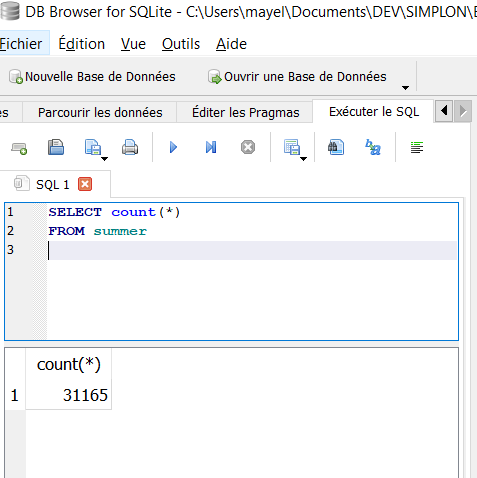

### Question 7: Quelle période des JO couvre ce fichier de résultats ?

In [ ]:
SELECT min(Year), max(Year)
FROM summer

### Question 8: Indiquer les années et villes des olympiades ? 

In [ ]:
SELECT DISTINCT Year, City 
FROM summer

### Q3. En 2012 combien de médailles le Japon a t-il gagné ? (Théo)

SELECT *
FROM summer
WHERE "Year" = "2012" AND "Country" = "JPN" 

## Q17. Entre 1984 et 2012 combien de médailles a gagné la France ? (Abire)

SELECT *
FROM summer
WHERE Year >= "1984" and Year <= "2012" AND "Country" = "FRA" 

### Q10. Combien de joueuses comptait la sélection brésilienne de volley-ball médaillée d’or aux J.O de 2012 ? (Corentin P)

In [ ]:
SELECT *
FROM summer
WHERE Year = "2012" AND Country = "BRA" AND Discipline = "Volleyball" AND "Gender" = "Women"



### Q13. Est-ce que la France à déjà gagné une médaille d’or au cricket ? (jordan)

In [ ]:
SELECT count(*)
FROM summer
WHERE Country = "FRA" AND Discipline = "Cricket" AND "Medal" = "Gold"

### Q12. Quel est l’athlète qui a remporté le plus de médailles d’or ? (mayel)

In [ ]:
SELECT Athlete, count(*)
FROM summer
WHERE Medal = "Gold"
GROUP BY Athlete
ORDER BY count(*) DESC
LIMIT 1

### Q1. Combien la France a remporté de médailles d’or aux JO de 1984 ? (Christophe)

In [ ]:
SELECT count(Country) as France, Medal
FROM summer
WHERE Year = 1984 AND Country = "FRA" AND Medal = "Gold"

### Q15. Le nombre de médailles d’or par pays en 2012 (Maëlle)


In [ ]:
# pour la question Q15 et Q5 même si les fonctions semblent juste, elles sont différentes de la réalité (quand on compare ces résultats aux données wikipédia par exemple).

SELECT Country, count(DISTINCT Event)
FROM summer 
WHERE Year = "2012" and Medal = "Gold"
GROUP BY Country
ORDER BY count(DISTINCT Event) DESC

### Q5. Quel pays a remporté le plus de médailles d’or ? (Philippe)


SELECT Country, count(*)
FROM summer 
WHERE Medal = "Gold"
GROUP BY Country
ORDER BY count(*) DESC
LIMIT 1

### Q7. Combien de femmes ont obtenu  une médaille d’or ? (Lamia)

In [ ]:
SELECT Athlete, count(*)
FROM summer 
WHERE Medal = "Gold" and Gender = "Women"
GROUP BY Athlete
ORDER BY count(*)

### Q16. Combien de femmes ont remportées des médailles ?

In [ ]:
SELECT count(DISTINCT Athlete)
FROM summer 
WHERE Gender = "Women"

### Q11. Combien de femmes françaises ont gagnées en 2012 , quel sont leurs médailles ? (izak)


In [ ]:
#SELECT Athlete, count(*), Medal
#FROM summer
#WHERE Country = "FRA" AND Gender = "Women"
#GROUP BY Athlete
#ORDER BY count(*) DESC

# pour obtenir le nombre de femme française qui ont gagné une médaile
SELECT Count(DISTINCT Athlete)
FROM summer
WHERE Country = "FRA" AND Gender = "Women" and Year = "2012"

In [ ]:
# liste des médailles françaises féminine
SELECT Athlete, Medal
FROM summer
WHERE Country = "FRA" AND Gender = "Women" and Year = "2012"

#### Q9. Combien de fois Londres a accueilli les J.O ? (Marvin)

In [ ]:
# pour avoir la réponse numérique directe
SELECT count(DISTINCT Year)
FROM summer
WHERE City = "London"

# réponse plus visuelle (tableau)
SELECT DISTINCT year, City
FROM summer
WHERE City = "London"


### Q6. Combien de villes différentes ont accueilli les JO d’été entre 1896 et 2012 ? (Yoann)

In [ ]:
SELECT Count(DISTINCT City)
FROM summer	
WHERE Year BETWEEN "1896" and "2012"


### Q2. Quel pays a le plus d’athlètes ? (Matthias)

In [ ]:
SELECT Country, count(DISTINCT Athlete)
FROM summer
GROUP BY Country
ORDER BY count(DISTINCT Athlete) DESC
LIMIT 1

### Q8. Combien de sports différents sont représentés par année ? (joris)

In [ ]:
SELECT Year, count(distinct Sport)
FROM summer 
GROUP BY Year 

### Q4. Dans quels différents sports les Grecs ont-ils gagné des médailles ? (Corentin L)

In [ ]:
SELECT Sport, count(Medal)
FROM summer 
WHERE Country = "GRE"
GROUP by Sport%

### Q14. Combien de médaillés ont un nom de famille de plus de 6 lettres en excluant les années paires ? (jonathan)


In [ ]:
# il n'y pas de JO d'été les années impaires, la réponse sera 0
SELECT Athlete
FROM summer
WHERE ([Year]% 2) != 0

In [ ]:
SELECT Athlete
FROM summer
WHERE Year = Year%2

### Question i: 

--- 

Fin